In [1]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Import self-made modules
from linear_model import LinearModel
from make_data import FrankeFunction
from prepare_data import create_design_matrix
from error_metrics import R2, MSE

In [2]:
# Make data
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)

z = FrankeFunction(x, y)

In [3]:
# Define empty list in which to store the MSE and R2 errors
mses = []
mses_train = []
r2s = []
r2s_train = []

# Train and test model for different polynomial derees
for i in range(1, 6):
    X = create_design_matrix(x, y, i)
    
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    
    # Calculate errors for test set
    mses.append(MSE(z_test, z_pred_test))
    r2s.append(R2(z_test, z_pred_test))
    
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    r2s_train.append(R2(z_train, z_pred_train)) 

In [4]:
# Import plotting functions
from plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

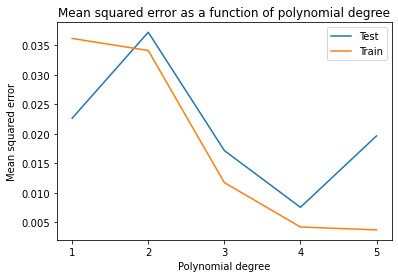

In [5]:
# Plot MSE
plot_mse_per_poldegree(mses_train, mses, pol_degree=5)

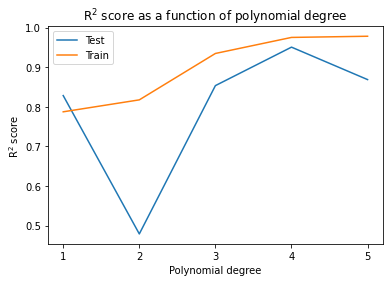

In [6]:
# Plot R2
plot_R2_per_poldegree(r2s_train, r2s, pol_degree=5)